## Data Storytelling

In [113]:
import pandas as pd

df_annual = pd.read_csv("co2_annmean_mlo.csv", skiprows=43)
df_annual.head()

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


In [114]:
df_annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    66 non-null     int64  
 1   mean    66 non-null     float64
 2   unc     66 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.7 KB


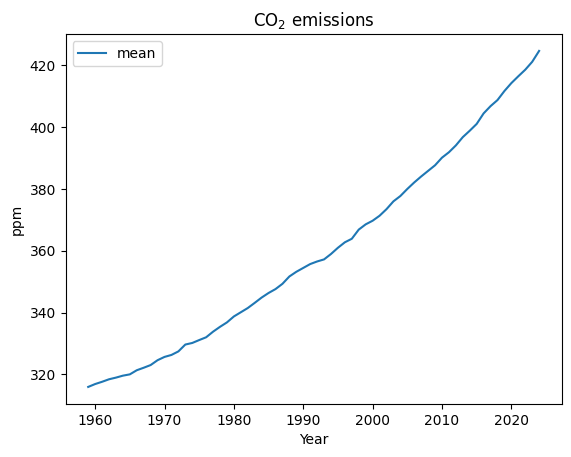

In [115]:
df_annual.plot(x= "year", y= "mean", ylabel = "ppm", xlabel = "Year", title = "CO$_2$ emissions");


In [116]:
df_country = pd.read_html("https://www.worldometers.info/co2-emissions/", index_col=0)[
    0
]
df_country.head()

,Country,"CO2 Emissions (tons, 2022)",1 Year Change,Population (2022),Per capita,Share of world
#,,,,,,
1,China,12667428430,-0.39%,1425179569,8.89,32.88%
2,United States,4853780240,1.78%,341534046,14.21,12.60%
3,India,2693034100,6.52%,1425423212,1.89,6.99%
4,Russia,1909039310,-1.22%,145579899,13.11,4.96%
5,Japan,1082645430,0.65%,124997578,8.66,2.81%


In [117]:
df_country = df_country.rename({"Share  of world": "World percentage"}, axis = 1)
df_country.head()

,Country,"CO2 Emissions (tons, 2022)",1 Year Change,Population (2022),Per capita,World percentage
#,,,,,,
1,China,12667428430,-0.39%,1425179569,8.89,32.88%
2,United States,4853780240,1.78%,341534046,14.21,12.60%
3,India,2693034100,6.52%,1425423212,1.89,6.99%
4,Russia,1909039310,-1.22%,145579899,13.11,4.96%
5,Japan,1082645430,0.65%,124997578,8.66,2.81%


In [118]:
df_country["World percentage"] = (
    df_country["World percentage"].str.rstrip("%").astype(float)
)
df_country.head()

,Country,"CO2 Emissions (tons, 2022)",1 Year Change,Population (2022),Per capita,World percentage
#,,,,,,
1,China,12667428430,-0.39%,1425179569,8.89,32.88
2,United States,4853780240,1.78%,341534046,14.21,12.60
3,India,2693034100,6.52%,1425423212,1.89,6.99
4,Russia,1909039310,-1.22%,145579899,13.11,4.96
5,Japan,1082645430,0.65%,124997578,8.66,2.81


<Axes: xlabel='Country'>

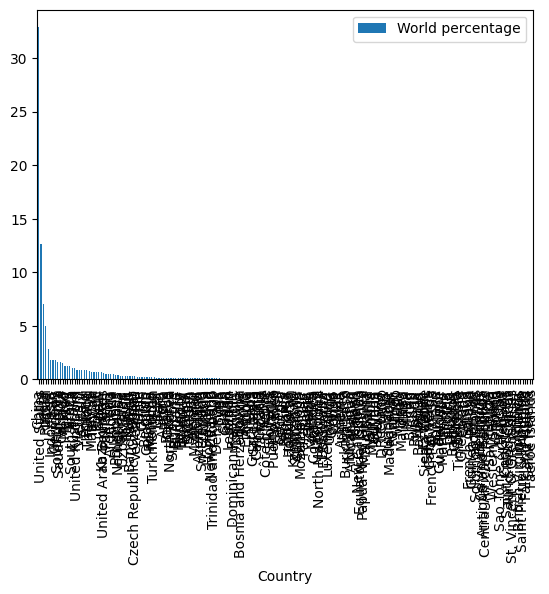

In [119]:
df_country.plot(kind = "bar", x = "Country", y = "World percentage")

<Axes: xlabel='Country'>

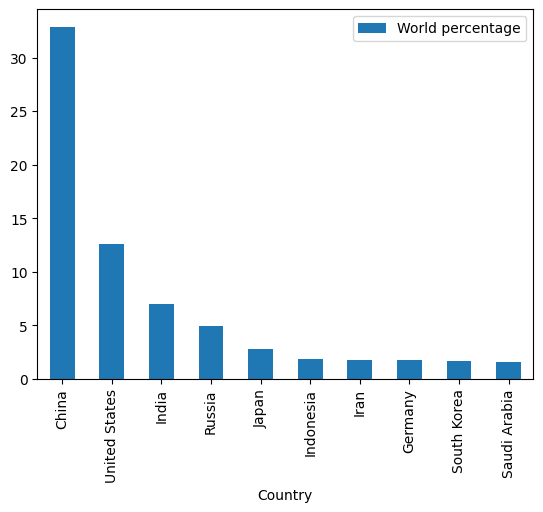

In [120]:
df_country.head(10).plot(kind = "bar", x = "Country", y = "World percentage")

#### Remove clutter

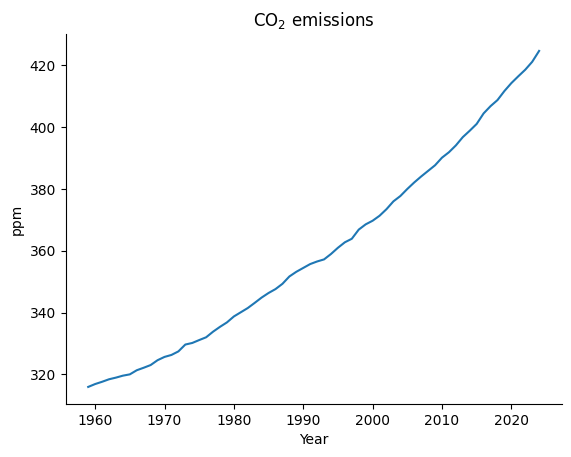

In [121]:
ax_annual = df_annual.plot(x= "year", y= "mean", ylabel = "ppm", xlabel = "Year", title = "CO$_2$ emissions");
ax_annual.spines["top"].set_visible(False)
ax_annual.spines["right"].set_visible(False)

ax_annual.legend().set_visible(False)

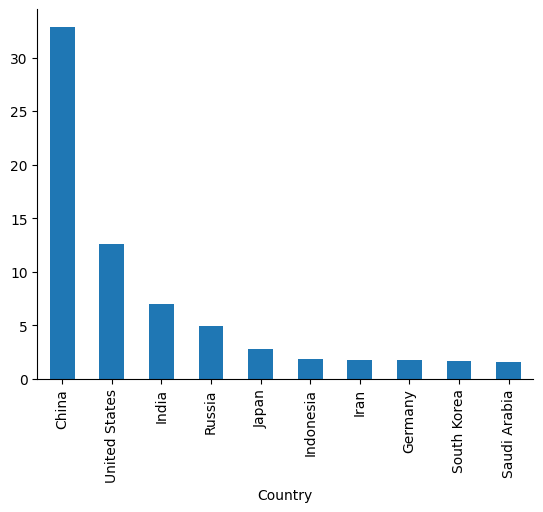

In [122]:
ax_percentage = df_country.head(10).plot(kind = "bar", x = "Country", y = "World percentage")
ax_percentage.spines["top"].set_visible(False)
ax_percentage.spines["right"].set_visible(False)

ax_percentage.legend().set_visible(False)

## Attention
here attention is referred to making your visuals  clearly mark the thing you want the audience to focus their attention towards.
A way to achieve this is to use color sparingly and in a strategic way.

## Contrast
We'll be using contrast in order to attract attention. The axis information will have low contrast to the background while the important information will have higher contrast compared to the background. For the bar chart, contrast will be used to direct audience towards the top three emitters.

## Descriptive title and labels
The norm has been a short title and labels, which are not descriptive enough and doesn't add much information to the visuals.
Here we'll use a descriptive title that conveys our message.

Text(0.0, 1.0, 'The annual mean of CO$_2$ emissions measured\nin Mauna Loa has increased every year since 1959')

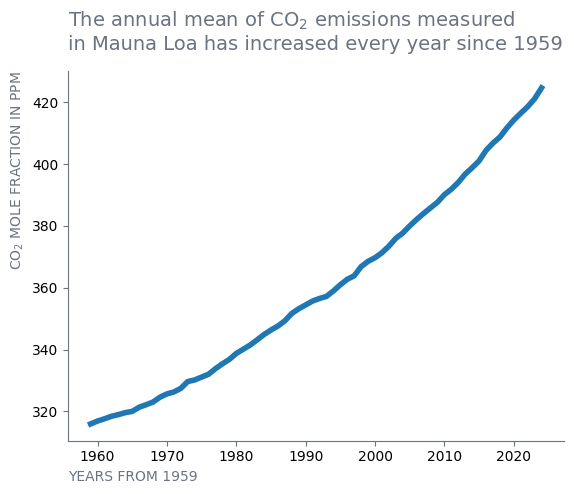

In [123]:
ax_annual = df_annual.plot(
    x="year",
    y="mean",
    linewidth=4,
)
GRAYf= "#6b7280"


ax_annual.spines["top"].set_visible(False)
ax_annual.spines["right"].set_visible(False)

ax_annual.spines["left"].set_color(GRAYf)
ax_annual.spines["bottom"].set_color(GRAYf)

ax_annual.tick_params(axis="both", color=GRAYf)

ax_annual.legend().set_visible(False)

ax_annual.set_xlabel("YEARS FROM 1959", loc="left", color=GRAYf)
ax_annual.set_ylabel("CO$_2$ MOLE FRACTION IN PPM", loc="top", color=GRAYf)
ax_annual.set_title(
    "The annual mean of CO$_2$ emissions measured\nin Mauna Loa has increased every year since 1959",
    loc="left",
    pad=15,
    color=GRAYf,
    fontsize=14,
)

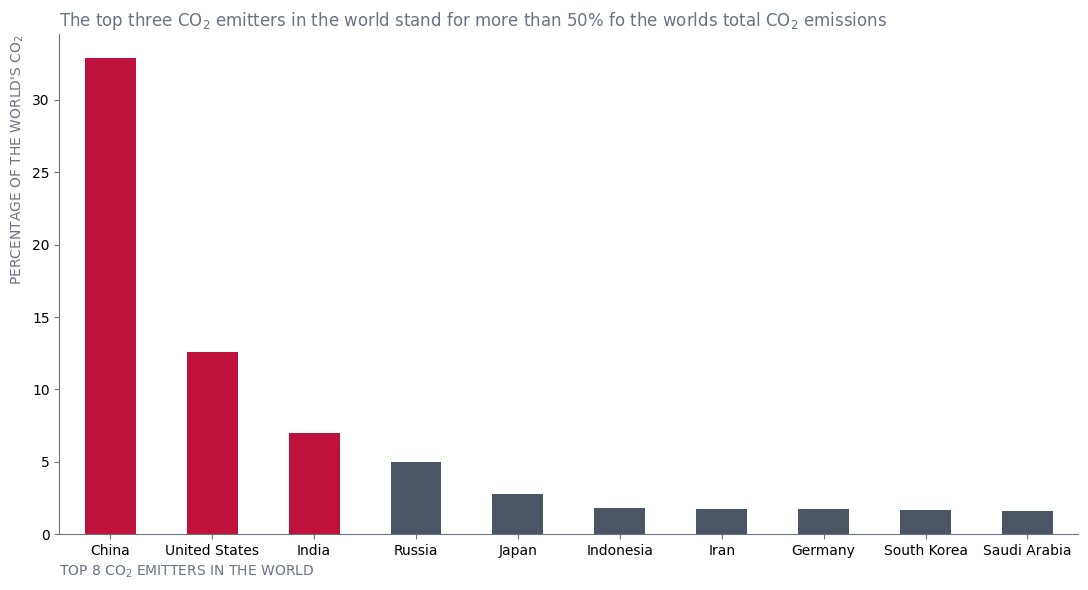

In [126]:
number_countries = 8
top_emitter = 3
red, gray = "#be123c", "#4b5563"


colors = [red] * top_emitter + [gray] * (number_countries * top_emitter)
colors

ax_percentage = df_country.head(10).plot(
    kind="bar", x="Country", y="World percentage", color=colors, rot=0
)


ax_percentage.spines["top"].set_visible(False)
ax_percentage.spines["right"].set_visible(False)

ax_percentage.spines["left"].set_color(GRAYf)
ax_percentage.spines["bottom"].set_color(GRAYf)

ax_percentage.tick_params(axis="both", color=GRAYf)

ax_percentage.legend().set_visible(False)

ax_percentage.set_xlabel("TOP 8 CO$_2$ EMITTERS IN THE WORLD", loc="left", color=GRAYf)
ax_percentage.set_ylabel("PERCENTAGE OF THE WORLD'S CO$_2$", loc="top", color=GRAYf)
ax_percentage.set_title("The top three CO$_2$ emitters in the world stand for more than 50% fo the worlds total CO$_2$ emissions", loc="left", color=GRAYf)


fig = ax_percentage.get_figure()
fig.set_size_inches(11, 6)
fig.tight_layout()